# **Importing Libraries:**


In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D, MaxPooling2D,BatchNormalization, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



---



# **Sample Images:**

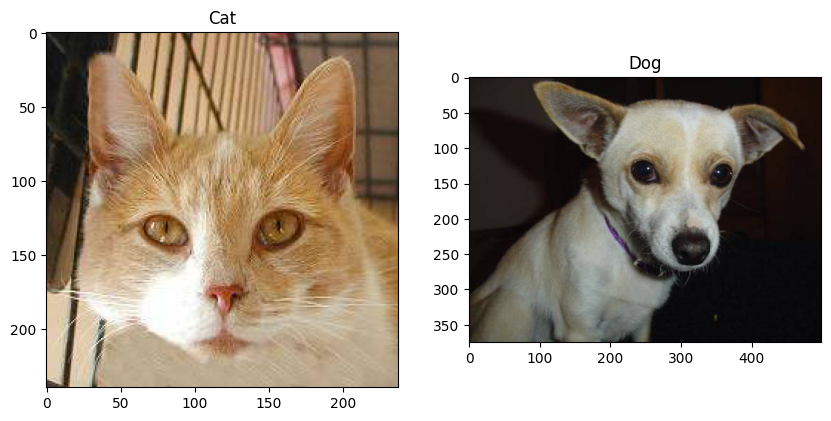

In [ ]:
# Load the images
image1 = Image.open("/content/drive/MyDrive/Ineuron/DL/Cats_dogs/cats_and_dogs_filtered/train/cats/cat.202.jpg")
image2 = Image.open("/content/drive/MyDrive/Ineuron/DL/Cats_dogs/cats_and_dogs_filtered/train/dogs/dog.104.jpg")

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axs[0].imshow(image1)
axs[0].set_title('Cat')

# Plot the second image
axs[1].imshow(image2)
axs[1].set_title('Dog')

# Show the plot
plt.show()



---



# **Model:**

In [ ]:
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


#2nd Convolutional Layer
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 64)       256       
 hNormalization)                                                 
                                                        



---



# **Model Compilation:**

In [ ]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])



---



#**Image Data Augmentation:**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=45,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Ineuron/DL/Cats_dogs/cats_and_dogs_filtered/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Ineuron/DL/Cats_dogs/cats_and_dogs_filtered/validation',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.




---



# **Training:**

In [ ]:
history=model.fit_generator(training_set,
                         steps_per_epoch = 32,
                         epochs = 32,
                         validation_data = valid_set,
                         validation_steps = 16)

<ipython-input-7-88f401c4f884>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(training_set,


Epoch 1/32
32/32 [==============================] - 20s 261ms/step - loss: 1.3631 - accuracy: 0.5630 - val_loss: 0.6847 - val_accuracy: 0.5320
Epoch 2/32
32/32 [==============================] - 8s 246ms/step - loss: 0.9389 - accuracy: 0.6070 - val_loss: 0.7978 - val_accuracy: 0.5060
Epoch 3/32
32/32 [==============================] - 11s 336ms/step - loss: 0.8214 - accuracy: 0.6150 - val_loss: 1.0237 - val_accuracy: 0.5060
Epoch 4/32
32/32 [==============================] - 7s 226ms/step - loss: 0.7632 - accuracy: 0.6140 - val_loss: 1.6237 - val_accuracy: 0.5000
Epoch 5/32
32/32 [==============================] - 8s 258ms/step - loss: 0.7176 - accuracy: 0.6550 - val_loss: 1.5237 - val_accuracy: 0.4940
Epoch 6/32
32/32 [==============================] - 7s 233ms/step - loss: 0.6739 - accuracy: 0.6340 - val_loss: 1.9283 - val_accuracy: 0.5000
Epoch 7/32
32/32 [==============================] - 7s 223ms/step - loss: 0.6690 - accuracy: 0.6740 - val_loss: 1.2799 - val_accuracy: 0.5360
Epoc



---



# **Save Model:**

In [ ]:
model.save("/content/drive/MyDrive/Ineuron/DL/Cats_dogs/output_model_.h5")



---



# **Evaluation of Model:**

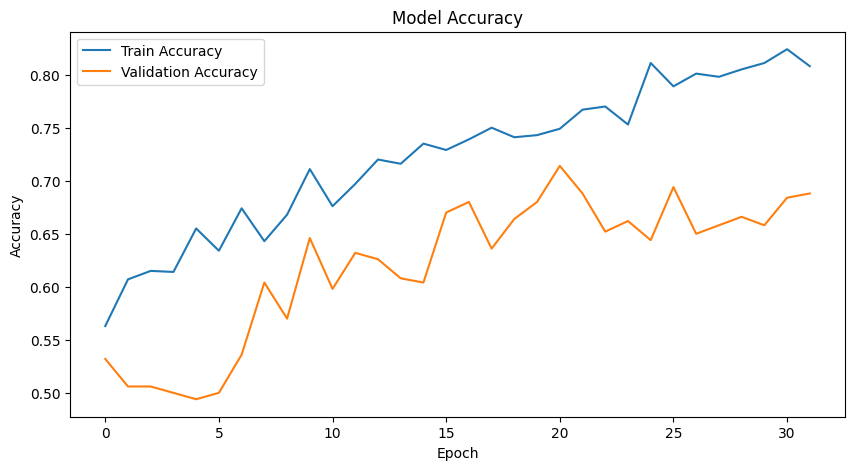

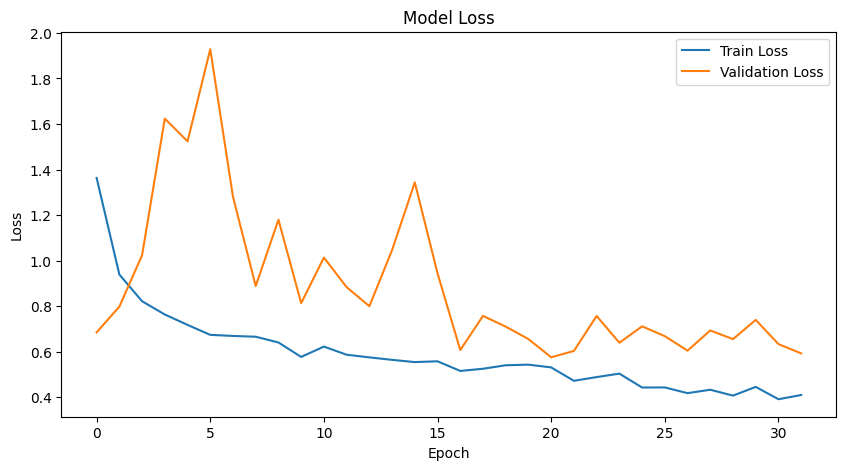

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



# **Predict Sample Images:**

In [2]:
#Loading model
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Ineuron/DL/Cats_dogs/output_model_.h5')

1/1 [==============================] - 0s 22ms/step
 Probability of test image being a Cat: 52.46%


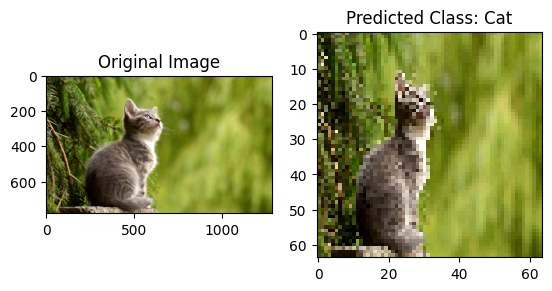

In [5]:
original_image=image.load_img('/content/drive/MyDrive/Ineuron/DL/Cats_dogs/Sample Images/cat-2083492_1280.jpg')
test_image = image.load_img('/content/drive/MyDrive/Ineuron/DL/Cats_dogs/Sample Images/cat-2083492_1280.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image= test_image /255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if round(result[0][0]) == 1:
    prediction = 'Dog'
    percentage= round((result[0][0]*100),2)
else:
    prediction = 'Cat'
    percentage= 100- round((result[0][0])*100,2)

print(f' Probability of test image being a {prediction}: {percentage}%')


# Create a figure and set up subplot grid
fig, axs = plt.subplots(1, 2)

# Display the original image
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

# Display the test image
axs[1].imshow(test_image[0])
axs[1].set_title('Predicted Class: {}'.format(prediction))

# Adjust spacing and display the plot
plt.show()